In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import sys
import os
import time

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler

读取所用的数据

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_val, x_train = x_train_all[:5000], x_train_all[5000:]
y_val, y_train = y_train_all[:5000], y_train_all[5000:]

print("x train shape:", x_train.shape)
print("y train shape:", y_train.shape)
print("x val shape:", x_val.shape)
print("x val shape:", x_val.shape)
print("x test shape:", x_test.shape)
print("x test shape:", x_test.shape)

x train shape: (55000, 28, 28)
y train shape: (55000,)
x val shape: (5000, 28, 28)
x val shape: (5000, 28, 28)
x test shape: (10000, 28, 28)
x test shape: (10000, 28, 28)


对数据做一个归一化

In [3]:
scaler = StandardScaler()
x_train_normalnize = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_val_normalnize = scaler.transform(x_val.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_normalnize = scaler.fit_transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


使用tf.keras的Sequential构建模型

In [5]:
"""# method1
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation='softmax'))"""

"""# method2
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])
"""

# 循环构建深度神经网络
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

#sparse: 因为y只是一个index的值，需要将其one hot成一个10维的向量，所以用sparse
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='adam',
             metrics=["accuracy"])

开始训练模型

In [6]:
log_dir = os.path.join("callbacks")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)
output_model_file = os.path.join(log_dir, "fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(log_dir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(min_delta=1e-3, patience=5)
]
history = model.fit(x_train_normalnize,
                    y_train, epochs=10,
                    validation_data=(x_val_normalnize, y_val),
                   callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 128us/sample - loss: 0.8155 - accuracy: 0.6597 - val_loss: 0.6072 - val_accuracy: 0.7366
Epoch 2/10
55000/55000 [==============================] - 7s 119us/sample - loss: 0.5999 - accuracy: 0.7704 - val_loss: 0.5327 - val_accuracy: 0.8180
Epoch 3/10
55000/55000 [==============================] - 6s 111us/sample - loss: 0.6360 - accuracy: 0.7652 - val_loss: 0.5541 - val_accuracy: 0.7998
Epoch 4/10
55000/55000 [==============================] - 5s 100us/sample - loss: 0.5466 - accuracy: 0.8090 - val_loss: 0.5249 - val_accuracy: 0.8176
Epoch 5/10
55000/55000 [==============================] - 6s 101us/sample - loss: 0.5228 - accuracy: 0.8184 - val_loss: 0.4875 - val_accuracy: 0.8380
Epoch 6/10
55000/55000 [==============================] - 7s 132us/sample - loss: 0.5234 - accuracy: 0.8169 - val_loss: 0.5475 - val_accuracy: 0.8078
Epoch 7/10
55000/55000 [===========================

查看history

In [13]:
print("history type:",type(history))
print(history.history)

history type: <class 'tensorflow.python.keras.callbacks.History'>
{'loss': [0.4554407998345115, 0.35051200881004335, 0.31446223289533093, 0.29109941672628575, 0.27324470184282823, 0.256380048150366, 0.24247208336808465, 0.23149045026410708, 0.21928390018181368, 0.20855428533445705], 'accuracy': [0.83403635, 0.8701091, 0.8837636, 0.8905454, 0.8966, 0.9028909, 0.9083091, 0.9124182, 0.9183273, 0.9211818], 'val_loss': [0.37629242771863936, 0.3488110849022865, 0.3319103286981583, 0.3342040733665228, 0.322185407525301, 0.30742622498273847, 0.32113203793168066, 0.3124026162028313, 0.31148544197082517, 0.3290452959537506], 'val_accuracy': [0.8666, 0.8706, 0.8792, 0.8742, 0.8898, 0.8886, 0.8886, 0.8908, 0.89, 0.896]}


画出各指标的变化趋势

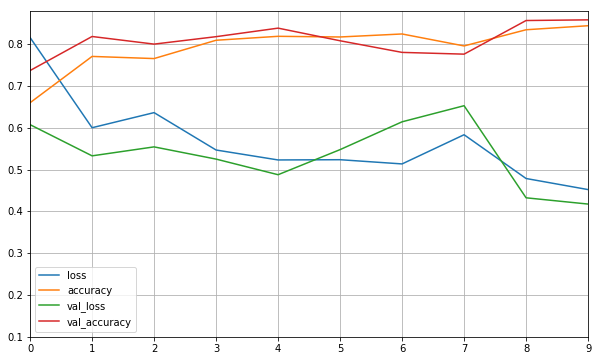

In [7]:
def curves(history):
    pd.DataFrame(history.history).plot(figsize=(10, 6))
    plt.grid(True)
    plt.gca().set_ylim(0.1)
    plt.show()
curves(history)

In [15]:
model.evaluate(x_test_normalnize, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3609276246279478, 0.8839]